# Top Hits Spotify (2000 - 2019)

My dataset "Top Hits Spotify (2000 - 2019)" contains audio statistics of the top 2000 tracks on Spotify from 2000-2019. The data contains about 18 columns each describing the track and it's qualities.
 
I took this dataset from https://www.kaggle.com/datasets?fileType=csv
I am going to perform some data performing, analysis and visualization.
I will use Pandas and Seaborn tools in this project. 
Pandas is a python library for data manipulation and analysis. 
Seaborn is built on top of matplotlib, which makes creating visualizations easier than ever.



### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

Lets start downloading our dataset.


In [163]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [164]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019'

In [165]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./top-hits-spotify-from-20002019" (use force=True to force download)


The dataset has been downloaded and extracted.

In [166]:
# Change this
data_dir = './top-hits-spotify-from-20002019'

In [167]:
import os
os.listdir(data_dir)

['songs_normalize.csv']

Let us save and upload our work to Jovian before continuing.

In [168]:
project_name = "top-hits-spotify-from-20002019" # change this (use lowercase letters and hyphens only)

In [169]:
!pip install jovian --upgrade -q

In [170]:
import jovian

In [171]:
jovian.commit(project="top-hits-spotify-from-20002019")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pragathisreepenikalapati/top-hits-spotify-from-20002019" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/pragathisreepenikalapati/top-hits-spotify-from-20002019


'https://jovian.ai/pragathisreepenikalapati/top-hits-spotify-from-20002019'

## Data Preparation and Cleaning

Loading the dataset into a data frame using Pandas.




Firstly let's import numpy and pandas 

In [172]:
import numpy as np

In [107]:
import pandas as pd

In this data set we have a dataset of songs_normalize.csv 

Lets firstly load this dataset and name it as songs_df

In [173]:
songs_df = pd.read_csv(data_dir + "/songs_normalize.csv")
songs_df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


Lets explore the data in the dataset

In [174]:
type(songs_df)

pandas.core.frame.DataFrame

In [175]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


We can observe the information reagrding data type, number of columns, number of rows, range of values, memory usage from the .info() method.

In [176]:
songs_df.describe() # gives the statistical information about numeric columns

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667437,0.720366,5.378000,-5.512435,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [177]:
songs_df.shape # gives the information of rows and columns as a tuple.

(2000, 18)

In [178]:
songs_df.isnull().values.any() # gives if there is any value missing 

False

isnull() is of bool type. As the output given here by isnull() is false so there is no value missing in the above data.

But in the name we can see the songs are from 2000 to 2019 but when we see in the dataset we observe that the songs from 1990 are also present. Lets try to remove songs from 1990

Also lets transform duration_ms to duration_s for easier understanding 

In [179]:
songs_df = songs_df[(songs_df.year >= 2000) & (songs_df.year <= 2019)]
songs_df["duration_s"] = songs_df.duration_ms.apply(lambda x : round(x/1000))
songs_df.drop("duration_ms", axis=1, inplace=True)
songs_df

/tmp/ipykernel_36/284996779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs_df["duration_s"] = songs_df.duration_ms.apply(lambda x : round(x/1000))
/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,artist,song,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_s
0,Britney Spears,Oops!...I Did It Again,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,211
3,Bon Jovi,It's My Life,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",224
4,*NSYNC,Bye Bye Bye,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,201
6,Eminem,The Real Slim Shady,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,hip hop,284
7,Robbie Williams,Rock DJ,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.0267,0.000000,0.4670,0.861,103.035,"pop, rock",259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop,181
1996,Taylor Swift,Cruel Summer,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop,178
1997,Blanco Brown,The Git Up,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country",201
1998,Sam Smith,Dancing With A Stranger (with Normani),False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop,171


Now we can see that the number of rows changed to 1958 from 2000. so we have successfully removed the songs from 1990.

In [180]:
import jovian

In [181]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pragathisreepenikalapati/top-hits-spotify-from-20002019" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/pragathisreepenikalapati/top-hits-spotify-from-20002019


'https://jovian.ai/pragathisreepenikalapati/top-hits-spotify-from-20002019'

## Exploratory Analysis and Visualization

Now lets do Exploratory Data Analysis on our dataset 



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [182]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Finding the 5 longest and shortest top hits:

In [183]:
songs_by_duration = songs_df.sort_values("duration_s", ascending=False)[["song", "artist", "duration_s"]]

In [184]:
# 5 longest top hits:
songs_by_duration[:5]

,song,artist,duration_s
1381,Mirrors,Justin Timberlake,484
140,Another Chance,Roger Sanchez,453
706,What Goes Around.../...Comes Around (Interlude),Justin Timberlake,449
760,LoveStoned / I Think She Knows (Interlude),Justin Timberlake,444
242,Days Go By,Dirty Vegas,432


In [185]:
# 5 shortest top hits:
songs_by_duration[-5:]

,song,artist,duration_s
1746,Gucci Gang,Lil Pump,124
1853,changes,XXXTENTACION,122
1752,Jocelyn Flores,XXXTENTACION,119
1939,Panini,Lil Nas X,115
1931,Old Town Road,Lil Nas X,113


Finding the Top Artist with their most popular song and plotting it on the graph 

Text(0.5, 0, 'Artist')

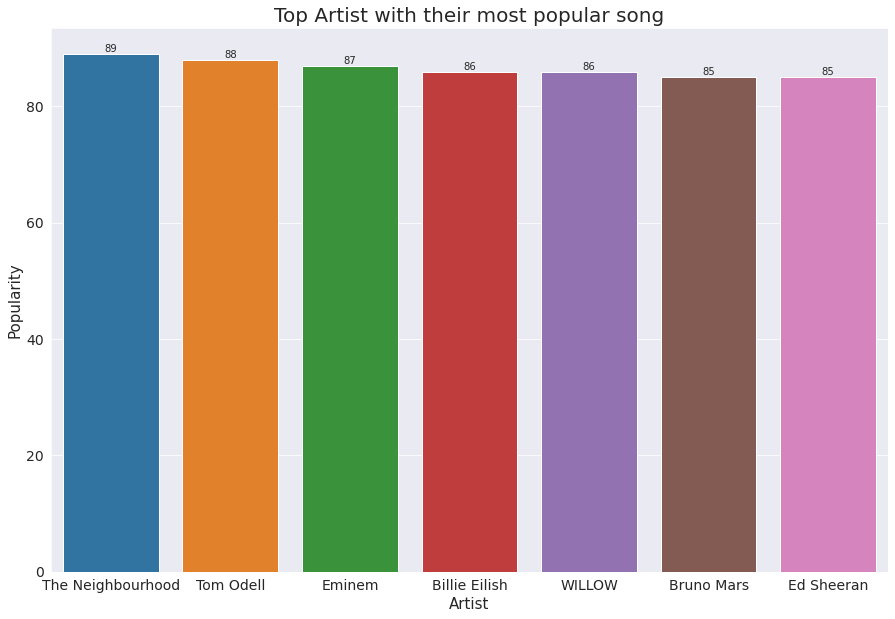

In [186]:
songs_df_artist_group = songs_df.groupby(['artist']).max().sort_values(['popularity'], ascending=False)
plt.figure(figsize=(15,10))
ax = sns.barplot(data= songs_df_artist_group.head(7), x= songs_df_artist_group.head(7).index, y='popularity')
ax.bar_label(ax.containers[0],  fontsize=10)
ax.set_title('Top Artist with their most popular song', fontsize=20)
ax.set_ylabel('Popularity', fontsize=15)
ax.set_xlabel('Artist', fontsize=15)

Finding top hits released by year and plotting it on graph

(array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

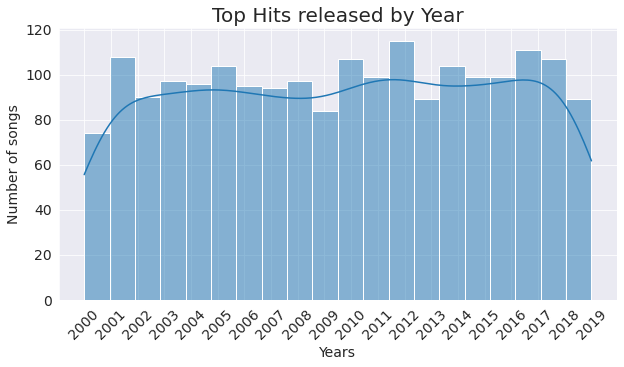

In [187]:
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.histplot(x="year", data=songs_df, kde=True, bins=20)
ax.set_title("Top Hits released by Year", fontsize=20)
ax.set_ylabel("Number of songs")
ax.set_xlabel("Years")
ax.set_xticks(range(2000, 2020, 1))
plt.xticks(rotation=45) # to avoid overlapping years

Finding the most popular genre and plotting it bar graph

Text(0.5, 0, 'Genre')

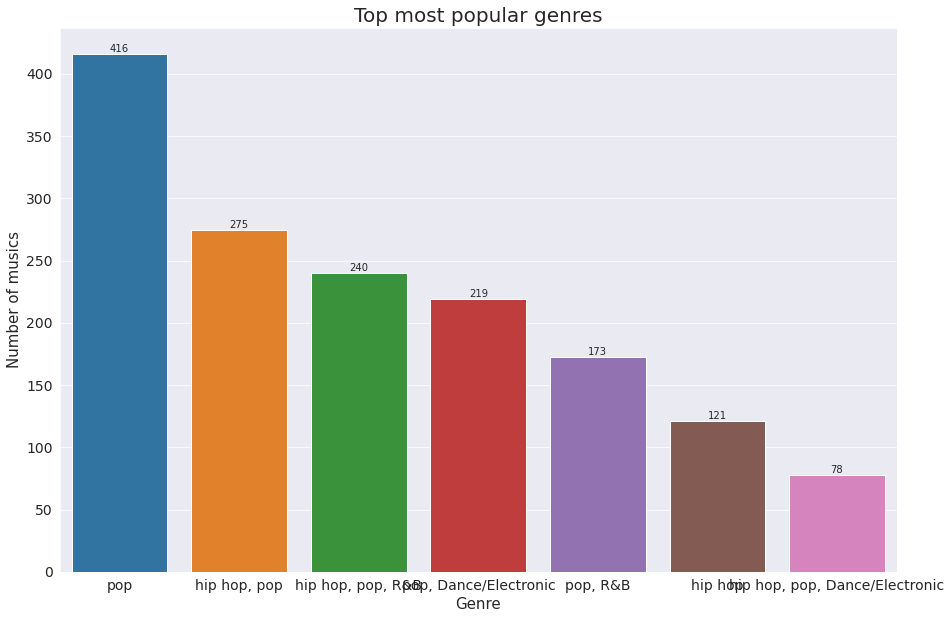

In [188]:
most_popular_genre_df = songs_df.groupby(['genre']).count()[['song']].sort_values(['song'], ascending=False)
plt.figure(figsize=(15,10))
ax = sns.barplot(data=most_popular_genre_df.head(7), x=most_popular_genre_df.head(7).index, y='song')
ax.bar_label(ax.containers[0],  fontsize=10)
ax.set_title('Top most popular genres', fontsize=20)
ax.set_ylabel('Number of musics', fontsize=15)
ax.set_xlabel('Genre', fontsize=15)

Let us save and upload our work to Jovian before continuing

In [189]:
import jovian

In [190]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pragathisreepenikalapati/top-hits-spotify-from-20002019" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/pragathisreepenikalapati/top-hits-spotify-from-20002019


'https://jovian.ai/pragathisreepenikalapati/top-hits-spotify-from-20002019'

## Some Intresting Questions on the dataset 

#### Q1: Find the artist's  average popularity and number of songs by them 

In [191]:
popByArtist = songs_df.groupby("artist").popularity.mean().reset_index()
songsByArtist = songs_df.groupby("artist").size().reset_index()
artists = popByArtist.merge(songsByArtist, on="artist")
artists.columns = ["artist", "popularity", "songs"]

In [192]:
artists

,artist,popularity,songs
0,*NSYNC,55.0,4
1,112,60.0,2
2,2 Chainz,70.0,2
3,21 Savage,76.0,2
4,2Pac,62.5,2
...,...,...,...
814,fun.,76.0,1
815,girl in red,82.0,1
816,iann dior,70.5,2
817,iio,54.0,1


We found the average popularity by using mean() and number of songs by using size() and created 3 columns by artists.columns 

#### Q2: Compare the average popularity with the number of songs by an artist 

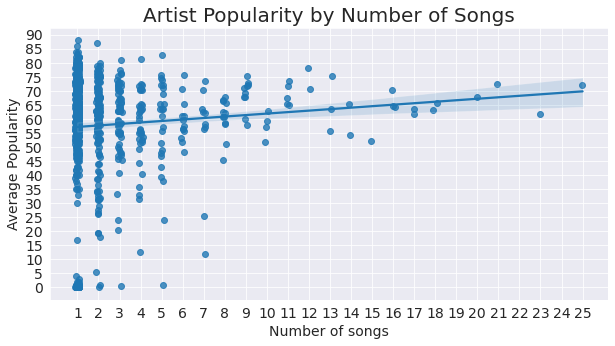

In [193]:
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.regplot(y="popularity", x="songs", data=artists, x_jitter=0.1)
ax.set_title("Artist Popularity by Number of Songs", fontsize=20)
ax.set_xlabel("Number of songs")
ax.set_xticks(np.arange(1, 26, 1))
ax.set_ylabel("Average Popularity")
ax.set_yticks(np.arange(0, 91, 5))

From the information in the before question we have plot the graph comparing the average popularity vs number of songs by a artist. 


#### Q3: Find the average popularity by genre 

Text(0.5, 0, 'Average popularity')

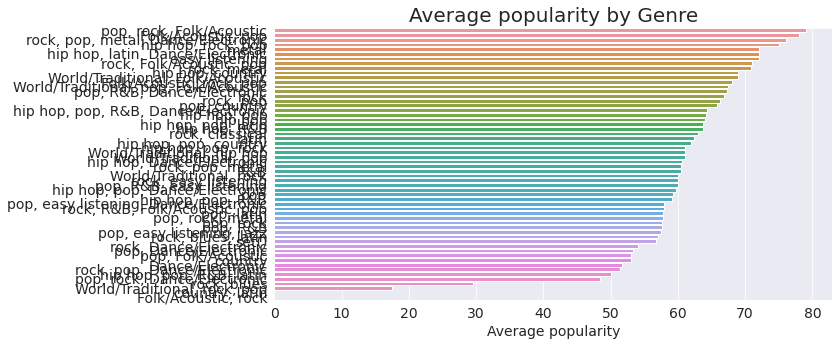

In [195]:
# defining genre 
songs_df_genre_exp = songs_df.explode("genre")
genre_cols = songs_df_genre_exp.columns.values[4:-1]
genre_cols = np.append(genre_cols, ["explicit"])
genres = songs_df_genre_exp.groupby("genre")[genre_cols].mean().reset_index()

# plotting the data 
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.barplot(x="popularity", y="genre",
                  data=genres.sort_values("popularity", ascending=False))
ax.set_title("Average popularity by Genre", fontsize=20)
ax.set_ylabel("")
ax.set_xlabel("Average popularity")

We can see that the Metal have the most average popularity. Next comes the Classical music with second most average popularity.
Blues have the least average popularity

#### Q4: Plot a heatmap for the songs_df  dataframe 

<AxesSubplot:>

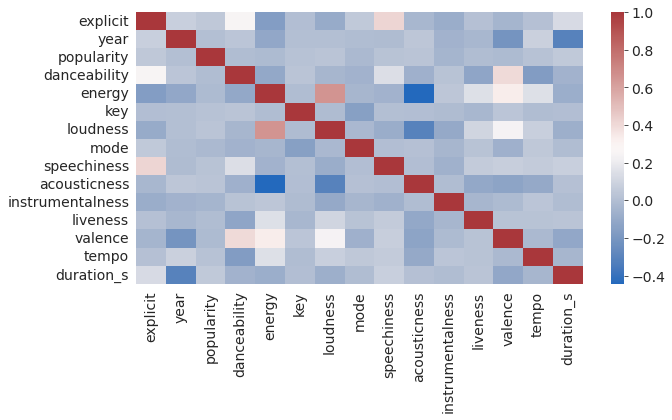

In [196]:
features = songs_df.drop(["artist"], axis=1)
corr = features.corr()
sns.heatmap(corr, cmap="vlag")

#### Q5: Draw a pie chart showing the explicit percentage 

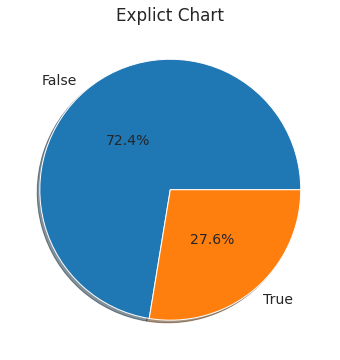

In [197]:
explicit_percentage = songs_df['explicit'].value_counts()
ax = plt.subplots(figsize=[10,6])
ax = plt.pie(x=explicit_percentage, autopct="%.1f%%", labels=songs_df['explicit'].value_counts().keys(), pctdistance=0.5,shadow=True )
ax = plt.title('Explict Chart')

Let us save and upload our work to Jovian before continuing.

In [198]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## Inferences and Conclusion

From the given dataset I got the following conclusions based on my analysis 

- The most popular artist is 'The Neighbourhood' with 89 popularity 
- The most popular genre is 'Pop' with 416 musics 
- Most of the top hits released in the yer 2012
- Average popularity of the 'Metal' is the most.
- Average popularity of the 'Blues' is the least.


In [159]:
import jovian

In [160]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pragathisreepenikalapati/top-hits-spotify-from-20002019" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/pragathisreepenikalapati/top-hits-spotify-from-20002019


'https://jovian.ai/pragathisreepenikalapati/top-hits-spotify-from-20002019'

## References and Future Work

I referred the https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas course for doing the data analysis on this dataset.
In recent days the most popularly used app is the spotify to listen music. So by doing the analysis on this dataset we can get clarity of what type of songs, artists etc.. are most popular. Based on this analysis we can provide the listeners a good amount of playlists with their requirements. So the uasage of the app also increases.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [161]:
import jovian

In [162]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pragathisreepenikalapati/top-hits-spotify-from-20002019" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/pragathisreepenikalapati/top-hits-spotify-from-20002019


'https://jovian.ai/pragathisreepenikalapati/top-hits-spotify-from-20002019'